<a href="https://colab.research.google.com/github/Milham10/PracticeML/blob/main/Dandelion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadilham","key":"c135aa2175052ec9f45f0d11197e5e12"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-15 10:13:05           8440        471  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indicators of Heart Disease           3MB  2022-02-16 10:18:03          13874        299  1.0              
datasets/ankanhore545/cost-of-living-index-2022                Cost of Living Index 2022                          4KB  2022-04-09 06:22:10           2713         51  0.8235294        
datasets/prasertk/best-tv-shows-of-all-time                    Best TV shows of 

In [ ]:
! kaggle datasets download -d coloradokb/dandelionimages

100% 3.52G/3.53G [00:23<00:00, 206MB/s]
100% 3.53G/3.53G [00:23<00:00, 163MB/s]


In [ ]:
! mkdir dandelionimages
! mv dandelionimages.zip dandelionimages

In [ ]:
%cd dandelionimages/

/content/dandelionimages


In [ ]:
! unzip dandelionimages.zip

Archive:  dandelionimages.zip
  inflating: Images/dandelion/IMG_1118.jpg  
  inflating: Images/dandelion/IMG_1119.jpg  
  inflating: Images/dandelion/IMG_1120.jpg  
  inflating: Images/dandelion/IMG_1121.jpg  
  inflating: Images/dandelion/IMG_1122.jpg  
  inflating: Images/dandelion/IMG_1123.jpg  
  inflating: Images/dandelion/IMG_1124.jpg  
  inflating: Images/dandelion/IMG_1125.jpg  
  inflating: Images/dandelion/IMG_1126.jpg  
  inflating: Images/dandelion/IMG_1127.jpg  
  inflating: Images/dandelion/IMG_1128.jpg  
  inflating: Images/dandelion/IMG_1129.jpg  
  inflating: Images/dandelion/IMG_1130.jpg  
  inflating: Images/dandelion/IMG_1131.jpg  
  inflating: Images/dandelion/IMG_1132.jpg  
  inflating: Images/dandelion/IMG_1133.jpg  
  inflating: Images/dandelion/IMG_1134.jpg  
  inflating: Images/dandelion/IMG_1135.jpg  
  inflating: Images/dandelion/IMG_1136.jpg  
  inflating: Images/dandelion/IMG_1137.jpg  
  inflating: Images/dandelion/IMG_1138.jpg  
  inflating: Images/dande

In [ ]:
cd /content/

/content


In [ ]:
ls

dandelionimages/  kaggle.json  sample_data/


In [ ]:
from imutils import paths
imagePaths = paths.list_images('dandelionimages')
data= []
labels= []

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
import os
for imagepath in imagePaths:
  image = Image.open(imagepath)
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(len(Y_train))

(946, 128, 128, 3)
(316, 128, 128, 3)
(946, 1)
(316, 1)
946


In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 30, 30, 32)       

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.001)
model.compile(optimizer = optimizers,
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
24/24 [==============================] - 1s 28ms/step - loss: 0.7504 - accuracy: 0.4854 - val_loss: 0.6921 - val_accuracy: 0.6263
Epoch 2/70
24/24 [==============================] - 0s 17ms/step - loss: 0.6898 - accuracy: 0.5608 - val_loss: 0.6882 - val_accuracy: 0.6158
Epoch 3/70
24/24 [==============================] - 0s 17ms/step - loss: 0.6881 - accuracy: 0.5304 - val_loss: 0.6857 - val_accuracy: 0.5316
Epoch 4/70
24/24 [==============================] - 0s 17ms/step - loss: 0.6715 - accuracy: 0.5675 - val_loss: 0.6586 - val_accuracy: 0.6105
Epoch 5/70
24/24 [==============================] - 0s 17ms/step - loss: 0.6373 - accuracy: 0.6415 - val_loss: 0.6685 - val_accuracy: 0.5474
Epoch 6/70
24/24 [==============================] - 0s 16ms/step - loss: 0.6116 - accuracy: 0.6561 - val_loss: 0.6142 - val_accuracy: 0.7105
Epoch 7/70
24/24 [==============================] - 0s 17ms/step - loss: 0.5740 - accuracy: 0.6944 - val_loss: 0.6088 - val_accuracy: 0.6895
Epoch 8/70
24

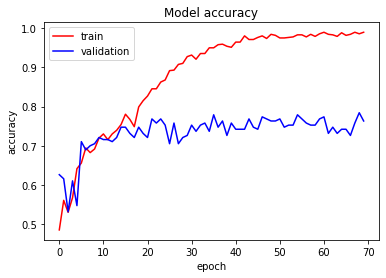

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

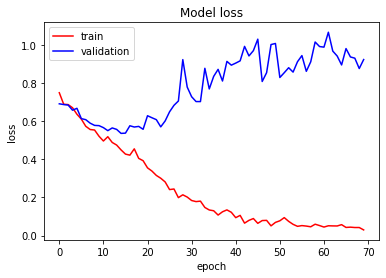

In [ ]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Masih overfit

In [ ]:
import os, signal
os.kill(     os.getpid() , 
         signal.SIGKILL
       )